## **Mount Google Drive**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Generate Synthetic Data**

In [ ]:
import random #Faker
import pandas as pd

employee_id = [i for i in range(1, 2001)]
department = [random.choice(["Sales", "Operations", "Technology", "Analytics", "HR"]) for i in range(2000)]
region = [random.choice(["East", "West", "North", "South"]) for i in range(2000)]
education = [random.choice(["Bachelor's", "Master's", "Doctorate"]) for i in range(2000)]
gender = [random.choice(["Male", "Female"]) for i in range(2000)]
recruitment_channel = [random.choice(["Referrals", "Campus", "Online"]) for i in range(2000)]
no_of_trainings = [random.randint(1, 10) for i in range(2000)]
age = [random.randint(22, 60) for i in range(2000)]
previous_year_rating = [random.uniform(0, 1) for i in range(2000)]
length_of_service = [random.randint(1, 20) for i in range(2000)]
awards_won = [random.choice([0, 1]) for i in range(2000)]
avg_training_score = [random.uniform(60, 100) for i in range(2000)]
is_promoted = [random.choice([0, 1]) for i in range(2000)]

data = {"employee_id": employee_id, "department": department, "region": region, "education": education,
        "gender": gender, "recruitment_channel": recruitment_channel, "no_of_trainings": no_of_trainings,
        "age": age, "previous_year_rating": previous_year_rating, "length_of_service": length_of_service,
        "awards_won": awards_won, "avg_training_score": avg_training_score, "is_promoted": is_promoted}

df = pd.DataFrame(data)
df = df.sample(frac=1).reset_index(drop=True)  # shuffle the data

df.to_csv("/content/drive/MyDrive/byron/employee_data.csv", index=False)  # save the data to a csv file


#Problem Statement

Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most. The ultimate reward for dedication and loyalty towards an organization and HR team plays an important role in handling all these promotion tasks based on ratings and other attributes available.

The HR team in XYZ company stored data of promotion cycle last year, which consists of details of all the employees in the company working last year and also if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.

So this time HR team wants to utilize the stored data to make a model, that will predict if a person is eligible for promotion or not.

You as a data scientist at XYZ company, need to come up with a model that will help the HR team to predict if a person is eligible for promotion or not.

# Objective
- Explore and visualize the dataset.
- Build a classification model to predict if the customer has a higher probability of getting a promotion
- Optimize the model using appropriate techniques
- Generate a set of insights and recommendations that will help the company

# Data Description

- employee_id: Unique ID for the employee
- department: Department of employee
- region: Region of employment (unordered)
- education: Education Level
- gender: Gender of Employee
- recruitment_channel: Channel of recruitment for employee
- no_ of_ trainings: no of other training completed in the previous year on soft skills, technical skills, etc.
- age: Age of Employee
- previous_ year_ rating: Employee Rating for the previous year
- length_ of_ service: Length of service in years
- awards_ won: if awards won during the previous year then 1 else 0
- avg_ training_ score: Average score in current training evaluations
- is_promoted: (Target) Recommended for promotion

### Importing Libraries

In [ ]:
!pip install nb_black

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.6 MB/s eta 0:00:00
  Created wheel for nb_black: filename=nb_black-1.0.7-py3-none-any.whl size=5298 sha256=13733290af699db29f48f62a524edbcb37d01abbc714e6b85f1eec0180803425
  Stored in directory: /root/.cache/pip/wheels/a6/5e/1e/a15614d6ea220d070043db3b650d73a8b4938aefd520496c11
Successfully built nb_black
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.

In [ ]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To impute missing values
from sklearn.impute import SimpleImputer

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## **Load The Data Set**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/byron/employee_data.csv")

<IPython.core.display.Javascript object>

In [ ]:
# Checking the number of rows and columns in the data
df.shape

(2000, 13)

<IPython.core.display.Javascript object>

## Data Overview

In [ ]:
# let's create a copy of the data
data = df.copy()

<IPython.core.display.Javascript object>

In [ ]:
# let's view the first 5 rows of the data
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,1740,Analytics,South,Bachelor's,Female,Referrals,4,37,0.713,6,1,86.145,1
1,1891,Analytics,North,Doctorate,Female,Referrals,6,46,0.785,1,0,87.104,1
2,1276,Technology,West,Doctorate,Female,Online,1,46,1.000,1,1,67.071,0
3,885,Analytics,South,Master's,Male,Campus,5,35,0.453,7,0,87.314,1
4,782,Technology,South,Doctorate,Male,Online,9,56,0.582,12,1,87.365,0


<IPython.core.display.Javascript object>

In [ ]:
# let's view the last 5 rows of the data
data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
1995,1750,Analytics,West,Doctorate,Male,Campus,8,47,0.516,9,0,70.156,0
1996,510,Analytics,North,Master's,Male,Referrals,5,41,0.971,19,1,80.597,0
1997,238,Analytics,West,Bachelor's,Female,Referrals,1,54,0.928,2,1,85.946,1
1998,1869,Analytics,North,Doctorate,Female,Campus,10,60,0.043,7,1,84.861,1
1999,250,Operations,South,Bachelor's,Female,Campus,10,45,0.388,1,1,64.247,1


<IPython.core.display.Javascript object>

In [ ]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           2000 non-null   int64  
 1   department            2000 non-null   object 
 2   region                2000 non-null   object 
 3   education             2000 non-null   object 
 4   gender                2000 non-null   object 
 5   recruitment_channel   2000 non-null   object 
 6   no_of_trainings       2000 non-null   int64  
 7   age                   2000 non-null   int64  
 8   previous_year_rating  2000 non-null   float64
 9   length_of_service     2000 non-null   int64  
 10  awards_won            2000 non-null   int64  
 11  avg_training_score    2000 non-null   float64
 12  is_promoted           2000 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 203.2+ KB


<IPython.core.display.Javascript object>

- There are 2000 observations and 13 columns in the data
- 5 columns are of object type and 8 columns are numerical.
- No missing values in any of the columns.

In [ ]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [ ]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

employee_id            0.000
department             0.000
region                 0.000
education              0.000
gender                 0.000
recruitment_channel    0.000
no_of_trainings        0.000
age                    0.000
previous_year_rating   0.000
length_of_service      0.000
awards_won             0.000
avg_training_score     0.000
is_promoted            0.000
dtype: float64

<IPython.core.display.Javascript object>

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,2000.000,1000.500,577.495,1.000,500.750,1000.500,1500.250,2000.000
no_of_trainings,2000.000,5.463,2.902,1.000,3.000,5.000,8.000,10.000
age,2000.000,41.318,11.167,22.000,32.000,41.000,51.000,60.000
previous_year_rating,2000.000,0.505,0.289,0.001,0.259,0.509,0.758,1.000
length_of_service,2000.000,10.609,5.742,1.000,6.000,10.000,16.000,20.000
awards_won,2000.000,0.493,0.500,0.000,0.000,0.000,1.000,1.000
avg_training_score,2000.000,80.160,11.643,60.008,69.877,80.164,90.138,99.994
is_promoted,2000.000,0.524,0.500,0.000,0.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

- The maximum number of training is 10 but at least 75% of employees had only 1 training.
- The average age of employees is ~35 and has a wide range from min 20 to max 60 years.
- Previous year ratings have a median of 3 which is expected as this rating is more common than other ratings.
- The average length of service is ~4 years and has a wide range from min 1 to max 37 years.
- The average training score is ~64 with a standard deviation of ~13.
- Most of the entries are 0 for the target variable which implies that the distribution of classes is imbalanced.

**Let's check the number of unique values in each column**

In [ ]:
data.nunique()

employee_id             2000
department                 5
region                     4
education                  3
gender                     2
recruitment_channel        3
no_of_trainings           10
age                       39
previous_year_rating    2000
length_of_service         20
awards_won                 2
avg_training_score      2000
is_promoted                2
dtype: int64

<IPython.core.display.Javascript object>

- Each value of the column 'employee_id' is a unique identifier for an employee. We can drop this column as it will not add any value to the model.
- The 'region' column has 34 unique categories

In [ ]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in department are :
Operations    430
HR            408
Analytics     401
Sales         390
Technology    371
Name: department, dtype: int64
**************************************************
Unique values in region are :
East     511
West     502
South    500
North    487
Name: region, dtype: int64
**************************************************
Unique values in education are :
Bachelor's    675
Doctorate     674
Master's      651
Name: education, dtype: int64
**************************************************
Unique values in gender are :
Female    1017
Male       983
Name: gender, dtype: int64
**************************************************
Unique values in recruitment_channel are :
Campus       687
Referrals    666
Online       647
Name: recruitment_channel, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

- There are 9 departments and the highest number of employees are in the Sales & Marketing department i.e. ~30.7% of the total number of employees.
- There are 34 unique regions and the highest number of employees are in region 2 i.e. ~22.5% of the total number of employees.
- Most of the employees have a bachelor's level of education i.e. ~67% of the total number of employees. There are very few employees with below secondary level of education.
- Most of the employees are males i.e. ~70% of the total number of employees.
- Approx 45% of employees are hired through sourcing or referrals and approx 55% of employees are hired from other sources.
- There are just ~2% of employees who won an award which is expected as awards are given only to few exceptional employees.
- There are just ~8.5% of employees who were promoted.

## Data Pre-processing

In [ ]:
# ID column consists of uniques ID for clients and hence will not add value to the modeling
data.drop(columns="employee_id", inplace=True)

<IPython.core.display.Javascript object>

## EDA

## Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observations on No. of Trainings

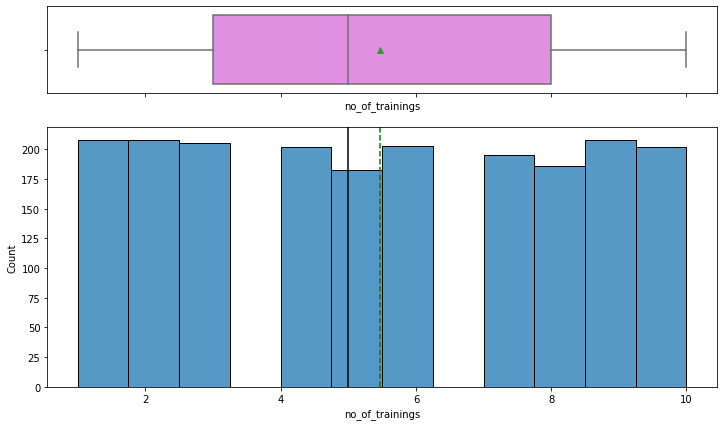

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data, "no_of_trainings")

### Observations on Age

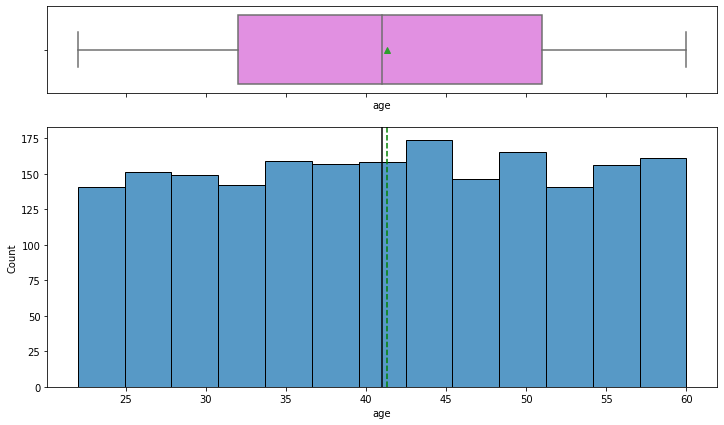

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data, "age")

### Observations on Length of Service

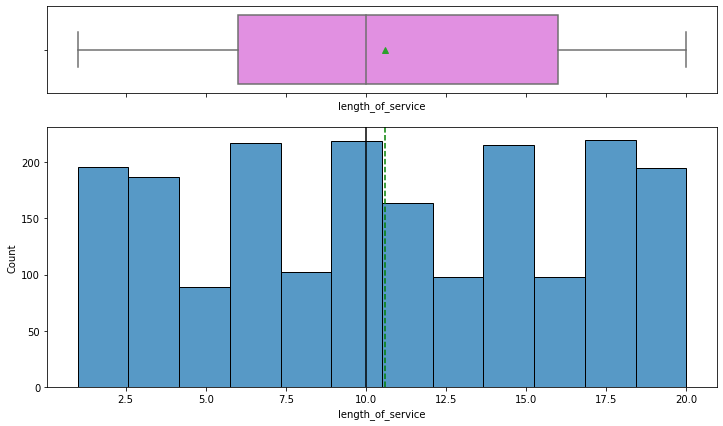

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data, "length_of_service")

### Observations on Average Training Score

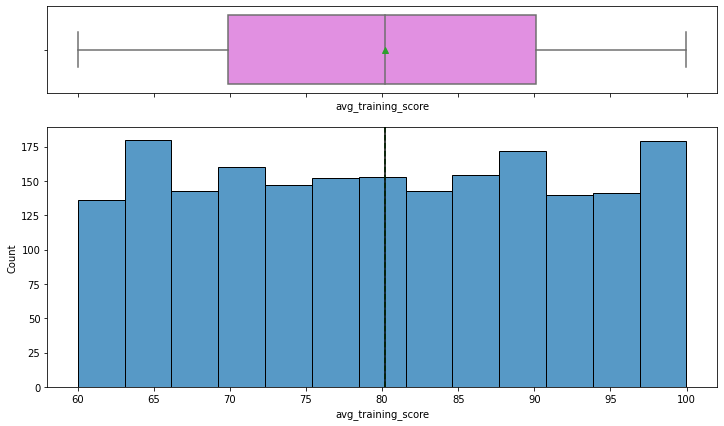

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data, "avg_training_score")

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on Department

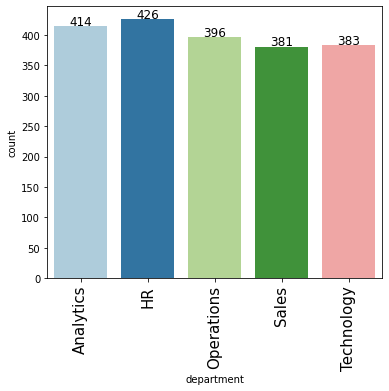

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "department")

### Observations on Education

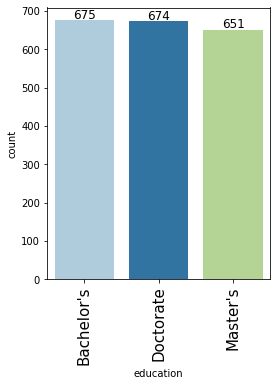

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "education")

### Observations on Gender

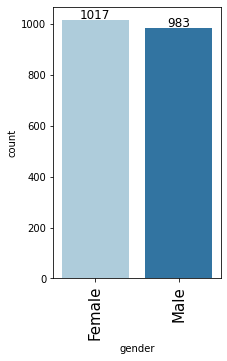

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "gender")

### Observations on Recruitment Channel

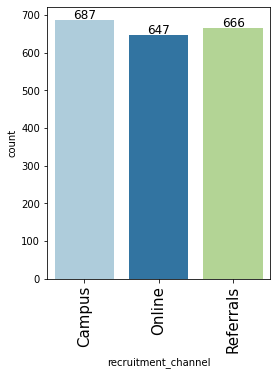

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "recruitment_channel")

### Observations on Previous Year Rating

In [ ]:
labeled_barplot(data, "previous_year_rating")

ValueError: ignored

<Figure size 144072x360 with 1 Axes>

<IPython.core.display.Javascript object>

### Observations on Awards Won


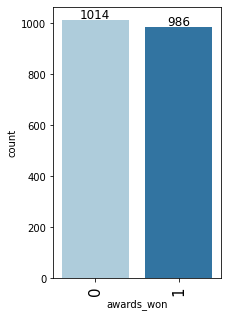

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "awards_won")

### Observations on Region

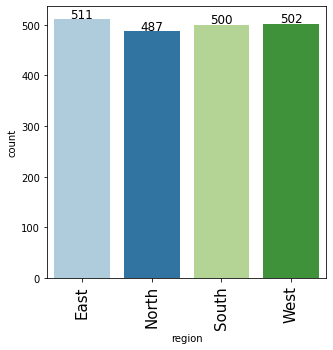

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "region")

### Observations on target variable

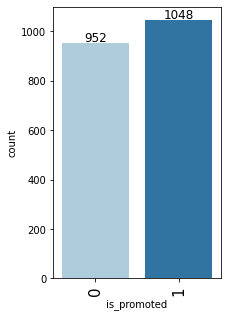

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "is_promoted")

## Bivariate Analysis

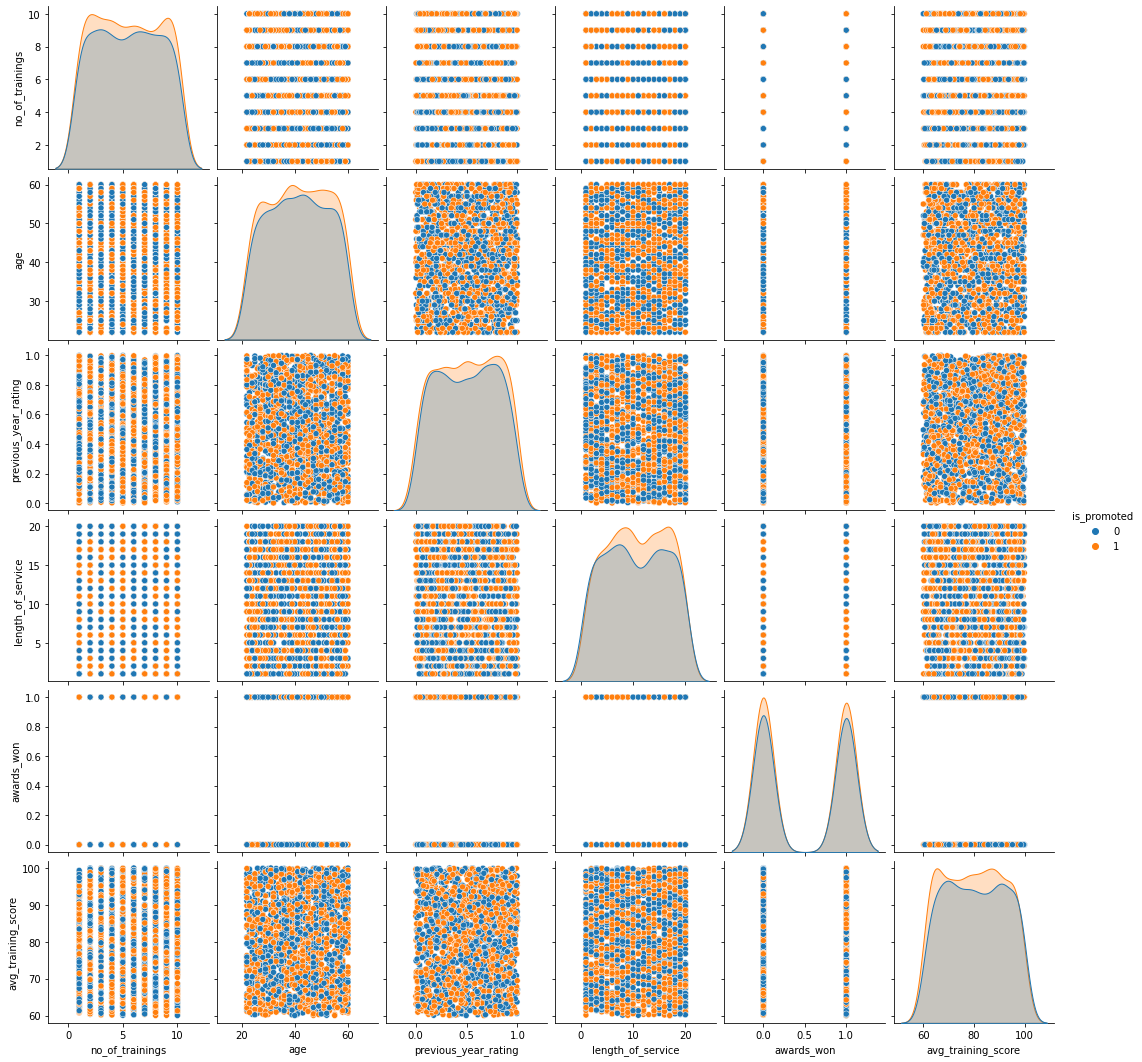

<IPython.core.display.Javascript object>

In [ ]:
sns.pairplot(data, hue="is_promoted")

- There are overlaps i.e. no clear distinction in the distribution of variables for employees who were recommended for promotion and who were not recommended for promotion.
- Let's explore this further with the help of other plots.

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### Target variable vs Age 

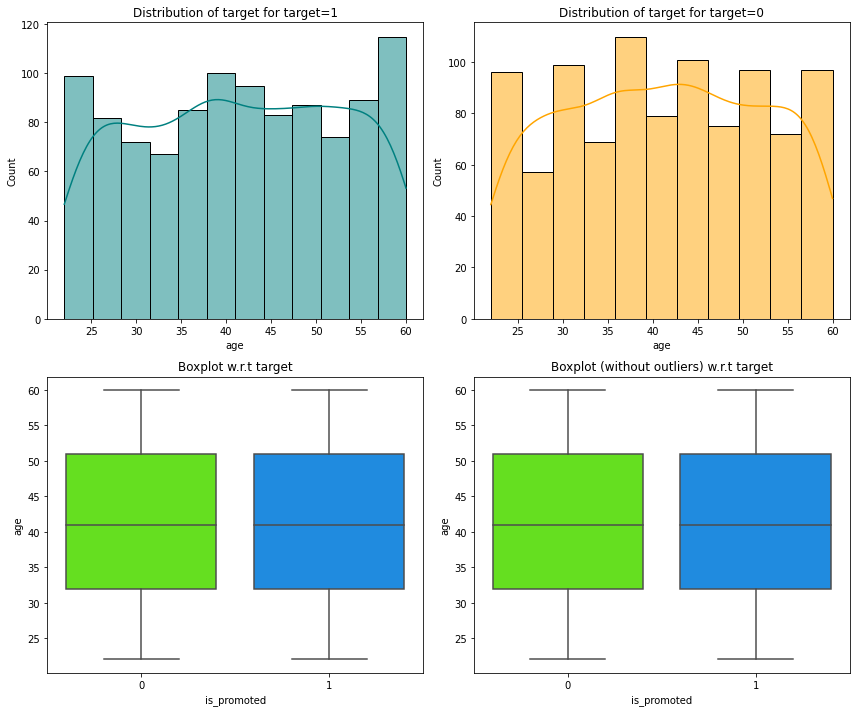

<IPython.core.display.Javascript object>

In [ ]:
distribution_plot_wrt_target(data, "age", "is_promoted")

- There is not much difference in the distribution for promoted and non-promoted employees.
- This shows that promotion does not depend on the age of the employee.

### Target variable vs Length of Service 

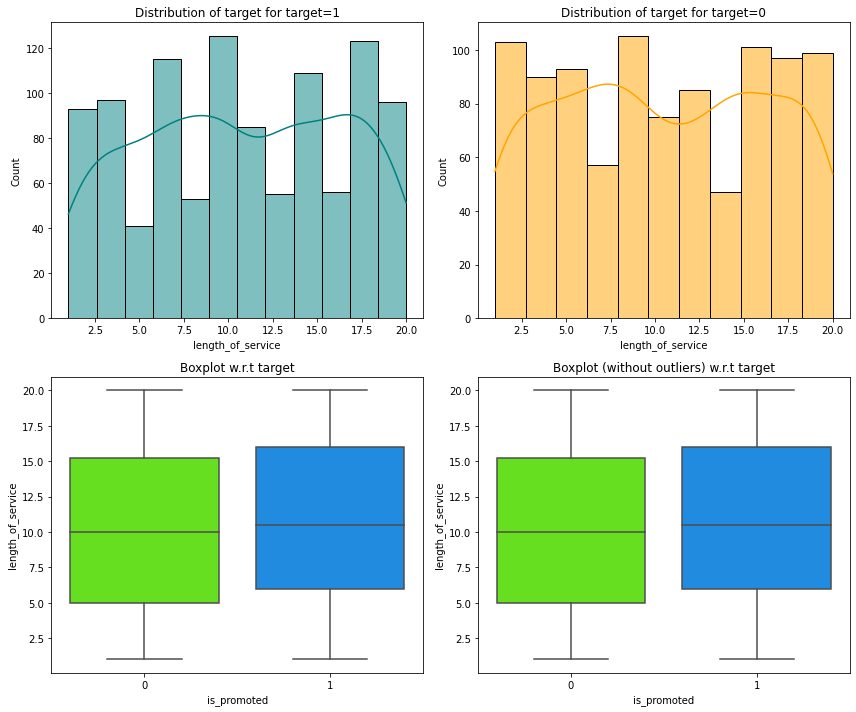

<IPython.core.display.Javascript object>

In [ ]:
distribution_plot_wrt_target(data, "length_of_service", "is_promoted")

- There is not much difference in the distribution for promoted and non-promoted employees.

### Target variable vs Average Training Score

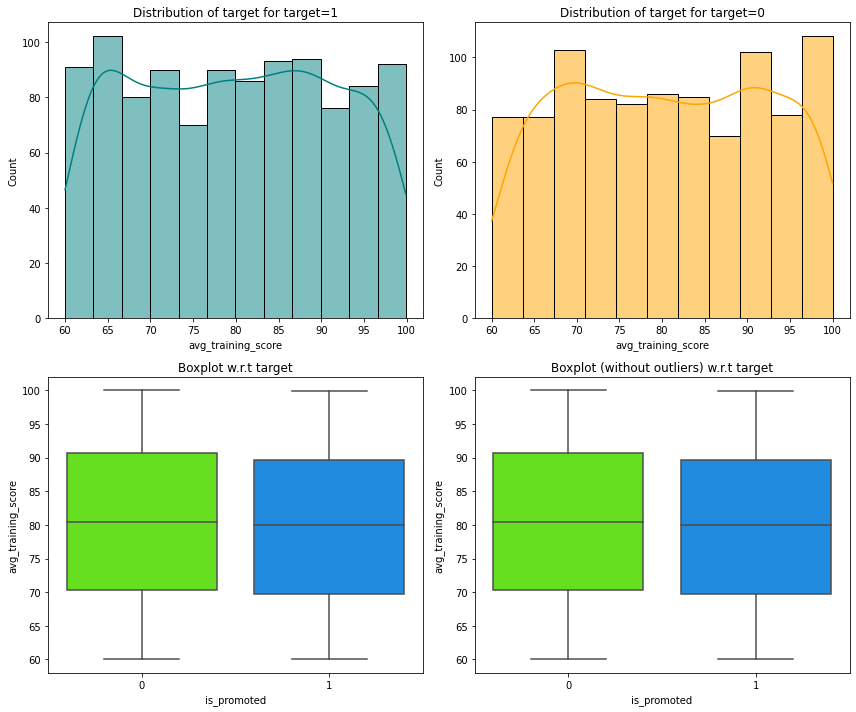

<IPython.core.display.Javascript object>

In [ ]:
distribution_plot_wrt_target(data, "avg_training_score", "is_promoted")

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### Target variable vs Department 

is_promoted    0     1   All
department                  
All          952  1048  2000
Operations   199   231   430
Technology   190   181   371
Analytics    189   212   401
HR           188   220   408
Sales        186   204   390
------------------------------------------------------------------------------------------------------------------------


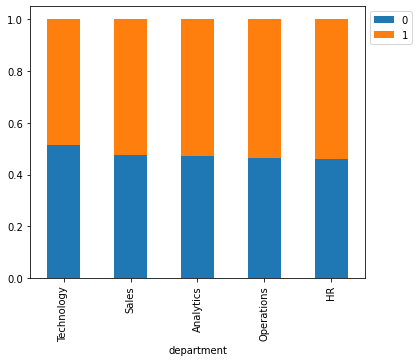

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "department", "is_promoted")

- The rate of promotions is very less in all departments and it is the least for the HR and Legal departments.
- The rate of promotions is comparatively higher for Analytics and Technology departments.

### Target variable vs Region

is_promoted    0     1   All
region                      
All          952  1048  2000
East         245   266   511
North        239   248   487
South        239   261   500
West         229   273   502
------------------------------------------------------------------------------------------------------------------------


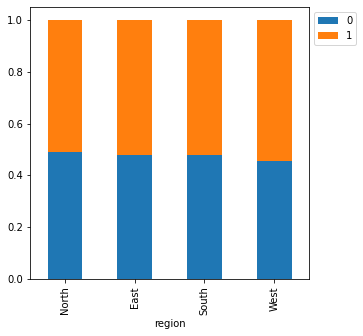

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "region", "is_promoted")

### Target variable vs Education

is_promoted    0     1   All
education                   
All          952  1048  2000
Bachelor's   326   349   675
Master's     317   334   651
Doctorate    309   365   674
------------------------------------------------------------------------------------------------------------------------


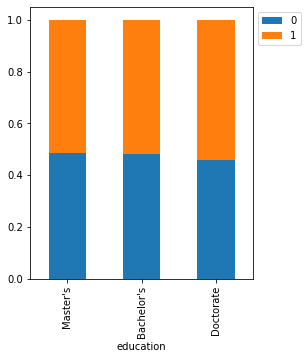

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "education", "is_promoted")

### Target variable vs Gender

is_promoted    0     1   All
gender                      
All          952  1048  2000
Female       483   534  1017
Male         469   514   983
------------------------------------------------------------------------------------------------------------------------


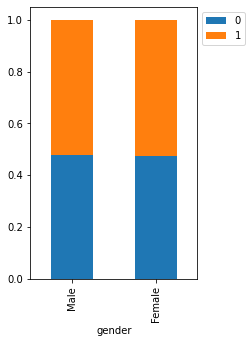

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "gender", "is_promoted")

### Target variable vs Recruitment Channel

is_promoted            0     1   All
recruitment_channel                 
All                  952  1048  2000
Referrals            325   341   666
Campus               320   367   687
Online               307   340   647
------------------------------------------------------------------------------------------------------------------------


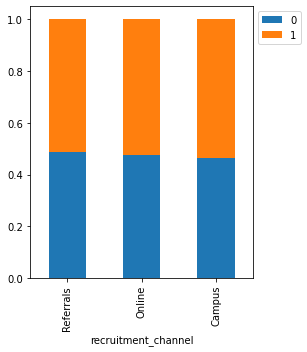

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "recruitment_channel", "is_promoted")

### Target variable vs Previous Year Rating

In [ ]:
stacked_barplot(data, "previous_year_rating", "is_promoted")

is_promoted             0     1   All
previous_year_rating                 
All                   952  1048  2000
0.4108674971160314      1     0     1
0.4181949876288593      1     0     1
0.4178583359605248      1     0     1
0.7952905239460132      1     0     1
...                   ...   ...   ...
0.4532331348598388      0     1     1
0.4528923464537066      0     1     1
0.4518167895756388      0     1     1
0.449572838910693       0     1     1
0.5090104156593651      0     1     1

[2001 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


ValueError: ignored

<Figure size 144072x360 with 1 Axes>

<IPython.core.display.Javascript object>

### Target variable vs Awards Won

is_promoted    0     1   All
awards_won                  
All          952  1048  2000
0            481   533  1014
1            471   515   986
------------------------------------------------------------------------------------------------------------------------


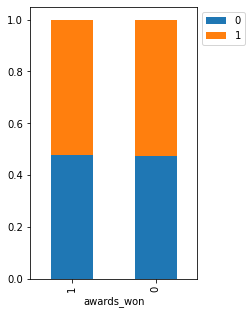

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "awards_won", "is_promoted")

<AxesSubplot:xlabel='awards_won', ylabel='avg_training_score'>

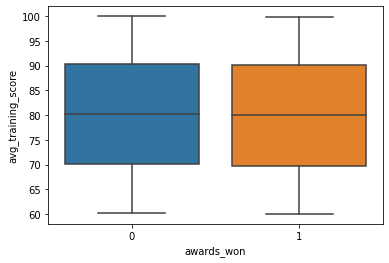

<IPython.core.display.Javascript object>

In [ ]:
sns.boxplot(data=data, x="awards_won", y="avg_training_score")

### Correlation Heatmap

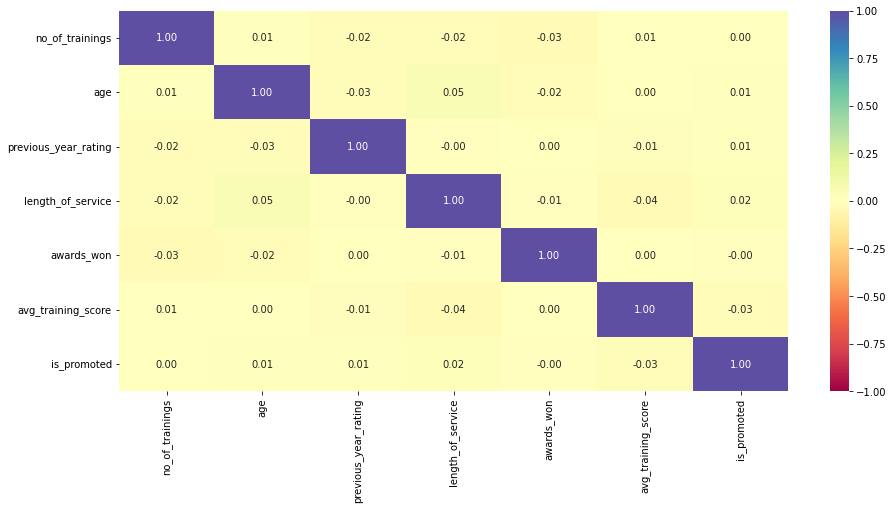

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Missing value imputation
- We will impute missing values in 'education' columns using mode
- We will impute missing values in 'previous_year_rating' and 'avg_training_score' with median

In [ ]:
data1 = data.copy()

<IPython.core.display.Javascript object>

In [ ]:
# Defining the imputers for numerical and categorical variables
imputer_mode = SimpleImputer(strategy="most_frequent")
imputer_median = SimpleImputer(strategy="median")

<IPython.core.display.Javascript object>

In [ ]:
X = data1.drop(["is_promoted"], axis=1)
y = data1["is_promoted"]

<IPython.core.display.Javascript object>

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(1200, 11) (400, 11) (400, 11)


<IPython.core.display.Javascript object>

In [ ]:
# Fit and transform the train data
X_train[["education"]] = imputer_mode.fit_transform(X_train[["education"]])

# Transform the validation data           
X_val[["education"]] = imputer_mode.transform(X_val[["education"]])

# Transform the test data
X_test[["education"]] = imputer_mode.transform(X_test[["education"]])

<IPython.core.display.Javascript object>

In [ ]:
# Fit and transform the train data
X_train[["previous_year_rating", "avg_training_score"]] = imputer_median.fit_transform(
    X_train[["previous_year_rating", "avg_training_score"]]
)

# Transform the validation data
X_val[["previous_year_rating", "avg_training_score"]] = imputer_median.transform(
    X_val[["previous_year_rating", "avg_training_score"]]
)

# Transform the test data
X_test[["previous_year_rating", "avg_training_score"]] = imputer_median.transform(
    X_test[["previous_year_rating", "avg_training_score"]]
)

<IPython.core.display.Javascript object>

In [ ]:
# Checking that no column has missing values in train, validation and test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64


<IPython.core.display.Javascript object>

- All missing values have been treated
- Let's inverse map the encoded values

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(1200, 18) (400, 18)


<IPython.core.display.Javascript object>

- After encoding variables, there are 19 features.  

## Building the model

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting an employee should get promoted when he/she should not get promoted
2. Predicting an employee should not get promoted when he/she should get promoted

### Which case is more important? 
* Both cases are important here as not promoting a deserving employee might lead to less productivity and the company might lose a good employee which affects the company's growth. Further, giving promotion to a non-deserving employee would lead to loss of monetary resources and giving such employee higher responsibility might again affect the company's growth. 

### How to reduce this loss i.e need to reduce False Negatives as well as False Positives?
* Bank would want `F1-score` to be maximized, as both classes are important here. Hence, the focus should be on increasing the F1-score rather than focusing on just one metric i.e. Recall or Precision.

**First, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred, average="macro")  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Models with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "f1_macro"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_val, model.predict(X_val), average="macro")
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 49.96336685830855
Bagging: 46.075492595173486
Random forest: 47.41347573460385
GBM: 50.71545323597959
Adaboost: 49.09022173222931
Xgboost: 51.92631733866965
dtree: 49.209112661497535

Validation Performance:

Logistic regression: 0.5171348332176209
Bagging: 0.4459973307144116
Random forest: 0.4871121285472138
GBM: 0.5472708058454593
Adaboost: 0.49249682810517564
Xgboost: 0.5048885999349854
dtree: 0.4893744837425847


<IPython.core.display.Javascript object>

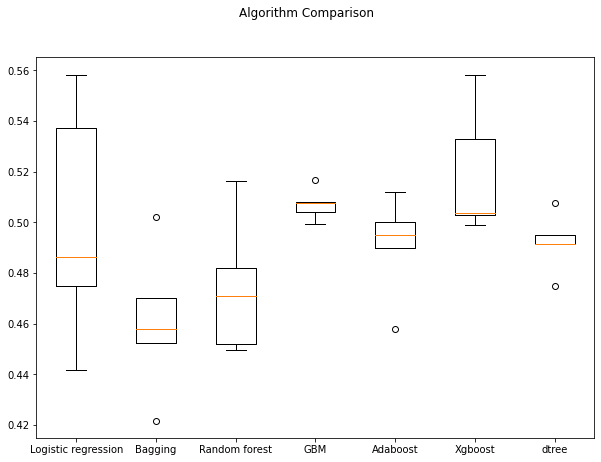

<IPython.core.display.Javascript object>

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Performance comparison
- Xgboost has the best performance followed by GBM classifier and bagging classifier.

## Which models should be tuned?
- Xgboost, adaboost and Gradient boosting have good performance on undersampled data

## Tuning XGBoost

In [ ]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = 'f1_macro'

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 2, 'n_estimators': 200, 'learning_rate': 0.2, 'gamma': 1} with CV score=0.4938396363506482:
CPU times: user 1.08 s, sys: 99.2 ms, total: 1.18 s
Wall time: 38.8 s


<IPython.core.display.Javascript object>

In [ ]:
tuned_xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=2,
    n_estimators=200,
    learning_rate=0.1,
    gamma=3,
)
tuned_xgb2.fit(X_train, y_train)

In [ ]:
xgb2_train = model_performance_classification_sklearn(tuned_xgb2, X_train, y_train)
xgb2_train

,Accuracy,Recall,Precision,F1
0,0.714,0.997,0.636,0.690


<IPython.core.display.Javascript object>

In [ ]:
xgb2_val = model_performance_classification_sklearn(tuned_xgb2, X_val, y_val)
xgb2_val

,Accuracy,Recall,Precision,F1
0,0.527,0.820,0.517,0.483


<IPython.core.display.Javascript object>

## Tuning Gradient Boosting Classifier

In [ ]:
%%time 

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = 'f1_macro'

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.4955135405754822:
CPU times: user 1.49 s, sys: 89.8 ms, total: 1.58 s
Wall time: 46.7 s


<IPython.core.display.Javascript object>

In [ ]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

<IPython.core.display.Javascript object>

In [ ]:
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train, y_train)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.898,0.895,0.901,0.898


<IPython.core.display.Javascript object>

In [ ]:
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.540,0.545,0.540,0.540


<IPython.core.display.Javascript object>

## Tuning Adaboost

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = 'f1_macro'

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.5061195283291829:
CPU times: user 1.39 s, sys: 94.9 ms, total: 1.48 s
Wall time: 44.2 s


<IPython.core.display.Javascript object>

In [ ]:
tuned_adb2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

In [ ]:
adb2_train = model_performance_classification_sklearn(tuned_adb2, X_train, y_train)
adb2_train

,Accuracy,Recall,Precision,F1
0,0.850,0.851,0.848,0.850


<IPython.core.display.Javascript object>

In [ ]:
adb2_val = model_performance_classification_sklearn(tuned_adb2, X_val, y_val)
adb2_val

,Accuracy,Recall,Precision,F1
0,0.490,0.435,0.489,0.488


<IPython.core.display.Javascript object>

## Model Performance comparison

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgb2_train.T,
        gbm2_train.T,
        adb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost",
    "Gradient Boosting",
    "AdaBoost",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost,Gradient Boosting,AdaBoost
Accuracy,0.714,0.898,0.850
Recall,0.997,0.895,0.851
Precision,0.636,0.901,0.848
F1,0.690,0.898,0.850


<IPython.core.display.Javascript object>

In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [xgb2_val.T, gbm2_val.T, adb2_val.T],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost",
    "Gradient Boosting",
    "AdaBoost",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,XGBoost,Gradient Boosting,AdaBoost
Accuracy,0.527,0.540,0.490
Recall,0.820,0.545,0.435
Precision,0.517,0.540,0.489
F1,0.483,0.540,0.488


<IPython.core.display.Javascript object>

In [ ]:
gbm2_test = model_performance_classification_sklearn(tuned_gbm2, X_test, y_test)
gbm2_test

,Accuracy,Recall,Precision,F1
0,0.505,0.465,0.505,0.504


<IPython.core.display.Javascript object>

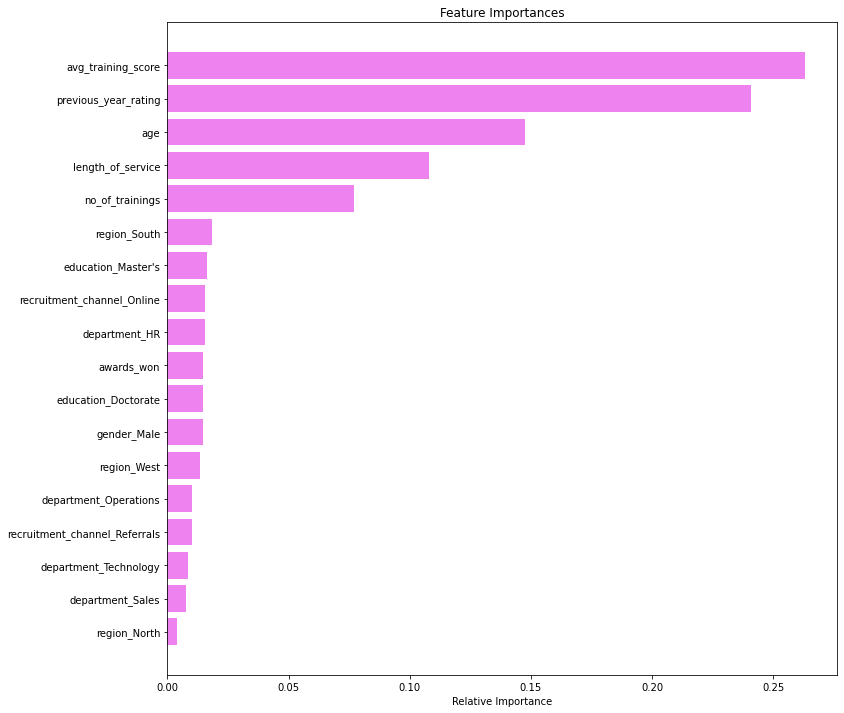

<IPython.core.display.Javascript object>

In [ ]:
feature_names = X_train.columns
importances = tuned_gbm2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Let's use Column Transformer to build the final model

- We will create 2 different pipelines, one for numerical columns and one for categorical columns
- For numerical columns, we will do missing value imputation as pre-processing
- For categorical columns, we will do one hot encoding and missing value imputation as pre-processing

- We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [ ]:
# creating a list of numerical variables
numerical_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score']

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ['department', 'region', 'education', 'gender', 'recruitment_channel']

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop",
)
# remainder = "drop" has been used, it will drop the variables that are not present in "numerical_features" 
# and "categorical_features" 


<IPython.core.display.Javascript object>

In [ ]:
# Separating target variable and other variables
X = data1.drop(columns="is_promoted")
Y = data1["is_promoted"]

<IPython.core.display.Javascript object>

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            2000 non-null   object 
 1   region                2000 non-null   object 
 2   education             2000 non-null   object 
 3   gender                2000 non-null   object 
 4   recruitment_channel   2000 non-null   object 
 5   no_of_trainings       2000 non-null   int64  
 6   age                   2000 non-null   int64  
 7   previous_year_rating  2000 non-null   float64
 8   length_of_service     2000 non-null   int64  
 9   awards_won            2000 non-null   int64  
 10  avg_training_score    2000 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 172.0+ KB


<IPython.core.display.Javascript object>

- Let's do basic pre-processing

- Now we already know the best model we need to process with, so we don't need to divide data into 3 parts

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(1400, 11) (600, 11)


<IPython.core.display.Javascript object>

In [ ]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "GBM",
            GradientBoostingClassifier(
                random_state=1,
                n_estimators=100,
                learning_rate=1,
                # base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'awards_won',
                                                   'avg_training_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                    

<IPython.core.display.Javascript object>

In [ ]:
import pickle

with open("/content/drive/MyDrive/Data_Science_Training/data/employee_promotion_gbm_model.pkl", "wb") as f:
  pickle.dump(model, f)  

<IPython.core.display.Javascript object>

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import pickle
import pandas as pd

def make_prediction(department, region, education, gender, recruitment_channel, no_of_trainings, age, previous_year_rating, length_of_service, awards_won, avg_training_score):
    with open("/content/drive/MyDrive/Data_Science_Training/data/employee_promotion_gbm_model.pkl", "rb") as f:
        clf  = pickle.load(f)
        input_data = pd.DataFrame([[department, region, education, gender, recruitment_channel, no_of_trainings, age, previous_year_rating, 
                   length_of_service, awards_won, avg_training_score]], columns=['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score'])
        preds = clf.predict(input_data)[0]
    if preds == 1:
            return "You are eligible for Promotion"
    return "You are not eligible for Promotion"

# Define the input fields for the model
department = gr.inputs.Dropdown(choices=['HR' , 'Analytics', 'Operations', 'Technology', 'Sales'], label='Department')
region = gr.inputs.Dropdown(choices=['North', 'South', 'East', 'West'], label='Region')
education = gr.inputs.Dropdown(choices=['Bachelor\'s', 'Master\'s', 'Doctorate'], label='Education')
gender = gr.inputs.Dropdown(choices=['Male', 'Female'], label='Gender')
recruitment_channel = gr.inputs.Dropdown(choices=['Referrals', 'Campus', 'Online'], label='Recruitment Channel')
no_of_trainings = gr.inputs.Number(label='No. of Trainings')
age = gr.inputs.Number(label='Age')
previous_year_rating = gr.inputs.Number(label='Previous Year Rating')
length_of_service = gr.inputs.Number(label='Length of Service')
awards_won = gr.inputs.Number(label='Awards Won')
avg_training_score = gr.inputs.Number(label='Avg. Training Score')

# We create the output
output = gr.Textbox()

app = gr.Interface(fn = make_prediction, inputs=[department, region, education, gender, recruitment_channel, no_of_trainings, age, previous_year_rating, length_of_service, awards_won, avg_training_score], outputs=output)
app.launch(show_error=True, debug=True, inline=False, share=True)
